![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

In [2]:
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [3]:
netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [4]:
netflix_subset = netflix_df.loc[netflix_df['type'] == 'Movie']
netflix_subset['type'].unique()

array(['Movie'], dtype=object)

In [5]:
netflix_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 1 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5377 non-null   object
 1   type          5377 non-null   object
 2   title         5377 non-null   object
 3   director      5214 non-null   object
 4   cast          4951 non-null   object
 5   country       5147 non-null   object
 6   date_added    5377 non-null   object
 7   release_year  5377 non-null   int64 
 8   duration      5377 non-null   int64 
 9   description   5377 non-null   object
 10  genre         5377 non-null   object
dtypes: int64(2), object(9)
memory usage: 504.1+ KB


Naturally, we don't need to keep show_id since it tells us nothing (and title should allow us to identify each movie), and type is only a unique value now (since we are only looking at movies and not tv_shows), so I will get rid of those two columns.

The director and cast attributes have a lot of missing values, but this information is too specific to tell us anything about why movie lengths would be decreasing in general (it wouldn't be because of one director or any cast members). We will get rid of those columns.

date_added to netflix also won't tell us anything about duration or during what era movie lengths were higher or lower, so we will also get rid of it.

description also contains information too specific to each film to tell us why movie lengths would be changing in length

country unforunately has missing information, but it's general enough to be useful so we will keep it

In [6]:
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [7]:
100 * netflix_movies['country'].value_counts().head(20) / len(netflix_movies)

United States     39.055235
India             16.421797
United Kingdom     6.341826
Canada             3.254603
France             2.547889
Spain              2.213130
Egypt              1.729589
Mexico             1.469221
Turkey             1.450623
Japan              1.394830
Indonesia          1.376232
Hong Kong          1.376232
Philippines        1.376232
Germany            1.264646
Nigeria            1.171657
Australia          1.041473
Brazil             0.967082
Argentina          0.929887
China              0.892691
South Korea        0.781105
Name: country, dtype: float64

The only countries that make a significant global proportion of movies are the United States, India and the UK. So if we're to find any explanation of why movie lengths are decreasing, it's almost certainly going to come from there (unless all the other countries combined have something in common)

In [8]:
100 * netflix_movies['genre'].value_counts() / len(netflix_movies)

Dramas                  25.739260
Comedies                19.973963
Documentaries           13.966896
Action                  13.408964
Children                 9.336061
Stand-Up                 5.969872
Horror Movies            4.537846
International Movies     2.120141
Classic Movies           1.432025
Uncategorized            1.041473
Thrillers                0.911289
Independent Movies       0.371955
Anime Features           0.353357
Music                    0.316161
Cult Movies              0.223173
Sci-Fi                   0.204575
Romantic Movies          0.055793
Sports Movies            0.018598
LGBTQ Movies             0.018598
Name: genre, dtype: float64

The only movie genres that take up a significant portion of movie length are Dramas, Comedies, Documentaries, Action, Children, Stand-Up and perhaps Horror. The other types of movies are so different and of such low amounts that they are very unlikely to be the source of significantly decreasing movie duration.

Now let's investigate the quantitative data.

In [9]:
netflix_movies.describe()

,release_year,duration
count,5377.000000,5377.000000
mean,2012.920030,99.307978
std,9.663282,28.530881
min,1942.000000,3.000000
25%,2012.000000,86.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


It's striking that the vast majority of movies on netflix were from recently, with over 75% being released after the beginning of 2012, which is also about what the mean is. The source of our effect is likely going to be coming from the huge numbers of recent movies.

An average movie duration is around 100 minutes, whether we consider mean or median. This is also useful information, especially for evaluating other cross-sections of the data.

**Next Steps:** If I was investigating this data, my next step would be to do a groupby on country and genre to find the mean and median release_year and duration for each. I still might do that, but the project directs me to inspect the data of movies shorter than 60 minutes, which also seems like an interesting step so I will give it a try to not waste any time.

In [10]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 35 to 7784
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         420 non-null    object
 1   country       354 non-null    object
 2   genre         420 non-null    object
 3   release_year  420 non-null    int64 
 4   duration      420 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 19.7+ KB


This isn't very many movies, so I'm not sure how much this will tell us, but it's easy to investigate so let's continue.

In [11]:
100 * short_movies['country'].value_counts().head(20) / len(short_movies)

United States     52.142857
United Kingdom    10.714286
Canada             5.238095
Mexico             2.857143
Japan              2.142857
India              1.904762
France             1.666667
Germany            0.714286
Australia          0.714286
Brazil             0.714286
Ireland            0.476190
Spain              0.476190
Netherlands        0.476190
Italy              0.476190
Argentina          0.476190
Georgia            0.238095
South Africa       0.238095
Pakistan           0.238095
Colombia           0.238095
Israel             0.238095
Name: country, dtype: float64

This is noteworthy: the numbers for the United States, the UK and Canada notably increase, but the numbers for India drop drastiaclly. It would seem that India produces very few short movies.

In [12]:
100 * short_movies['genre'].value_counts() / len(short_movies)

Documentaries           35.952381
Children                25.476190
Stand-Up                17.142857
Uncategorized            9.523810
Comedies                 3.571429
Dramas                   2.857143
Classic Movies           1.904762
Action                   1.428571
International Movies     0.714286
Anime Features           0.714286
Music                    0.476190
Horror Movies            0.238095
Name: genre, dtype: float64

This is also very noteworthy. Our two largest categories, Dramas and Comedies (and also Action which was quite large), are almost always at least 60 minutes in length, whereas Documentaries, Children's movies and Stand-Up movies are much more likely to be shorter than 60 minutes, making up about 80% of the short movie data

In [13]:
short_movies.describe()

,release_year,duration
count,420.000000,420.000000
mean,2014.276190,41.983333
std,11.701331,13.887795
min,1942.000000,3.000000
25%,2014.000000,29.000000
50%,2017.000000,46.000000
75%,2019.000000,54.000000
max,2021.000000,59.000000


Obviously short movies are short, so that doesn't tell us much, but we can see that short movies are even more likely to be recently released than standard movies are, raising the mean to 2014 and the median to 2017.

So overall, we can see the decreasing movie length effect is more likely coming from recent movies (as our friend proposed), but also from India playing less of a role in movie releases, and possibly from an increase in certain types of movies (Documentaries, Children's movies, and Stand-Up movies)

What we'll do next is assign those 3 genres of film to a unique color, assign all the others a different color, and plot a scatter plot to visualize the trends by release of these different genres

In [14]:
colors = []

for _, row in netflix_movies.iterrows():
    if row['genre'] == 'Documentaries':
        colors.append('b') #blue
    elif row['genre'] == 'Children':
        colors.append('y') #yellow
    elif row['genre'] == 'Stand-Up':
        colors.append('r') #red
    else:
        colors.append('k') #black
        
colors.count('b'), colors.count('y'), colors.count('r'), colors.count('k')

(751, 502, 321, 3803)

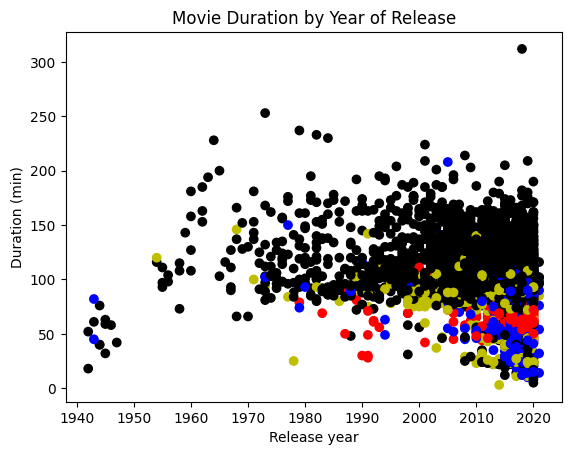

In [15]:
fig = plt.figure()
plt.scatter(x=netflix_movies['release_year'], y=netflix_movies['duration'], c=colors)
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release")
plt.show()

Looking at this plot makes it very clear, from the perspective of movie genres, why the average movie length could be decreasing with time: in recent years there have been increasing numbers of Documentaries, Children's movies and Stand-Up movies (represented by the colorful clowd on the lower right corner of the chart), which tend to be shorter in length, possibly lowering the average movie length.

This doesn't seem to affect the lengths of other types of movies though, so it's not clear just from this plot that movie lengths are getting shorter. To determine that, we'd need to perform additional quantitative analysis on movie duration over time (and it's pretty clear that controlling for movie genre alone would have a highly significant impact on the result)

In [16]:
answer = 'maybe'